In [3]:
import dicom2nifti
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os

In [7]:
import pandas as pd
import numpy as np

In [5]:
MRI_vol = nib.load('../data/raw/training-dataset/Case_N006/images/Case_N006.nii.gz')
type(MRI_vol)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 148 244   9   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [ 1.         1.4583334  1.4583334 10.         1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0

In [14]:
MRI_vol_data = MRI_vol.get_fdata()
type(MRI_vol_data)
MRI_vol_data.shape

(148, 244, 9)

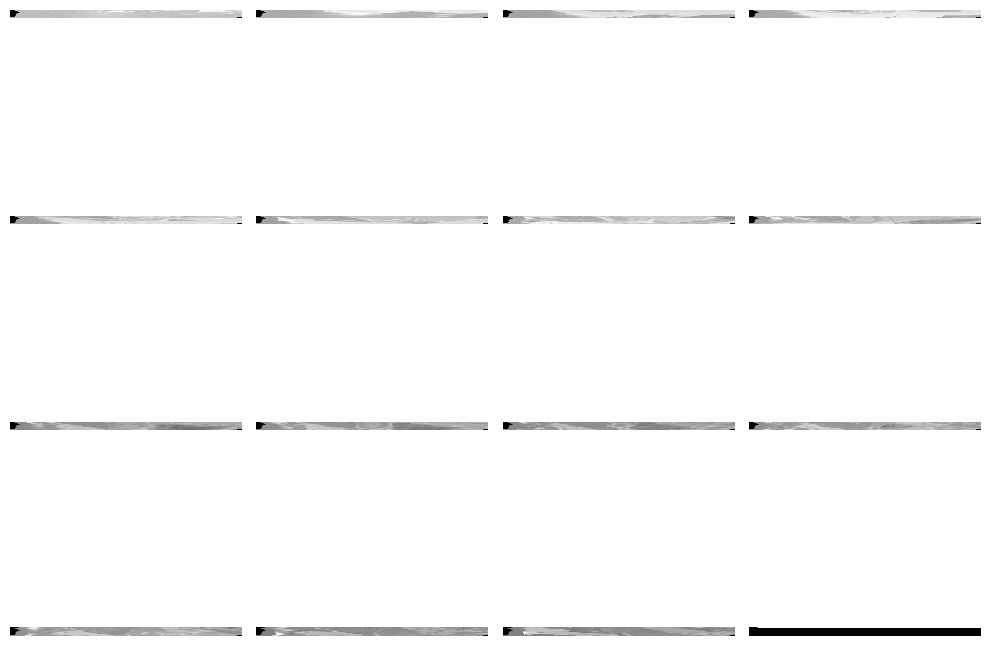

In [16]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = MRI_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(MRI_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

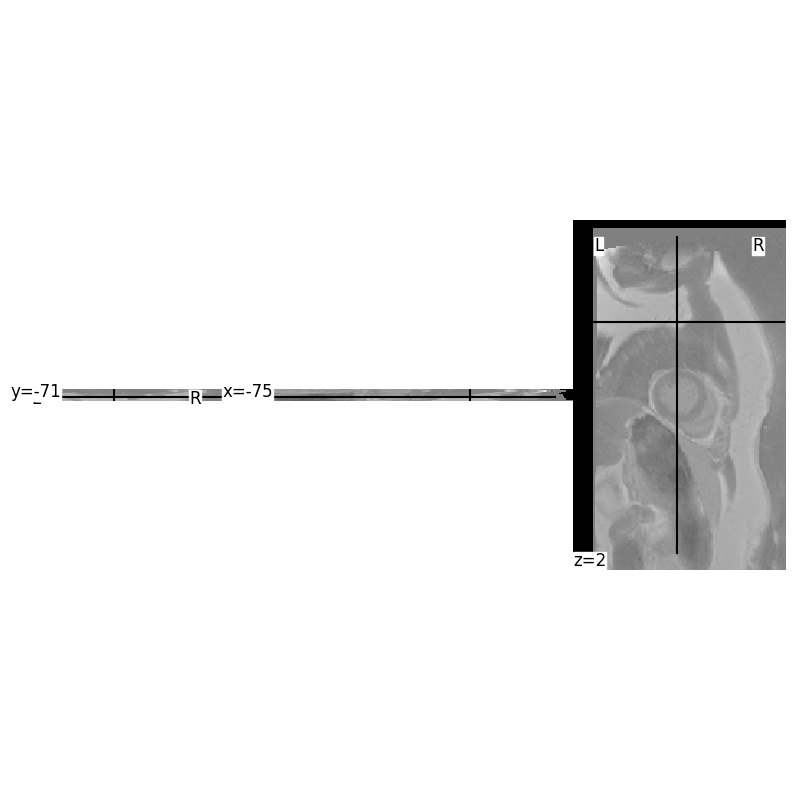

In [19]:
from nilearn import plotting

fig, ax = plt.subplots(figsize=[10,10])
plotting.plot_img(MRI_vol, cmap = 'gray', axes=ax)
plt.show()

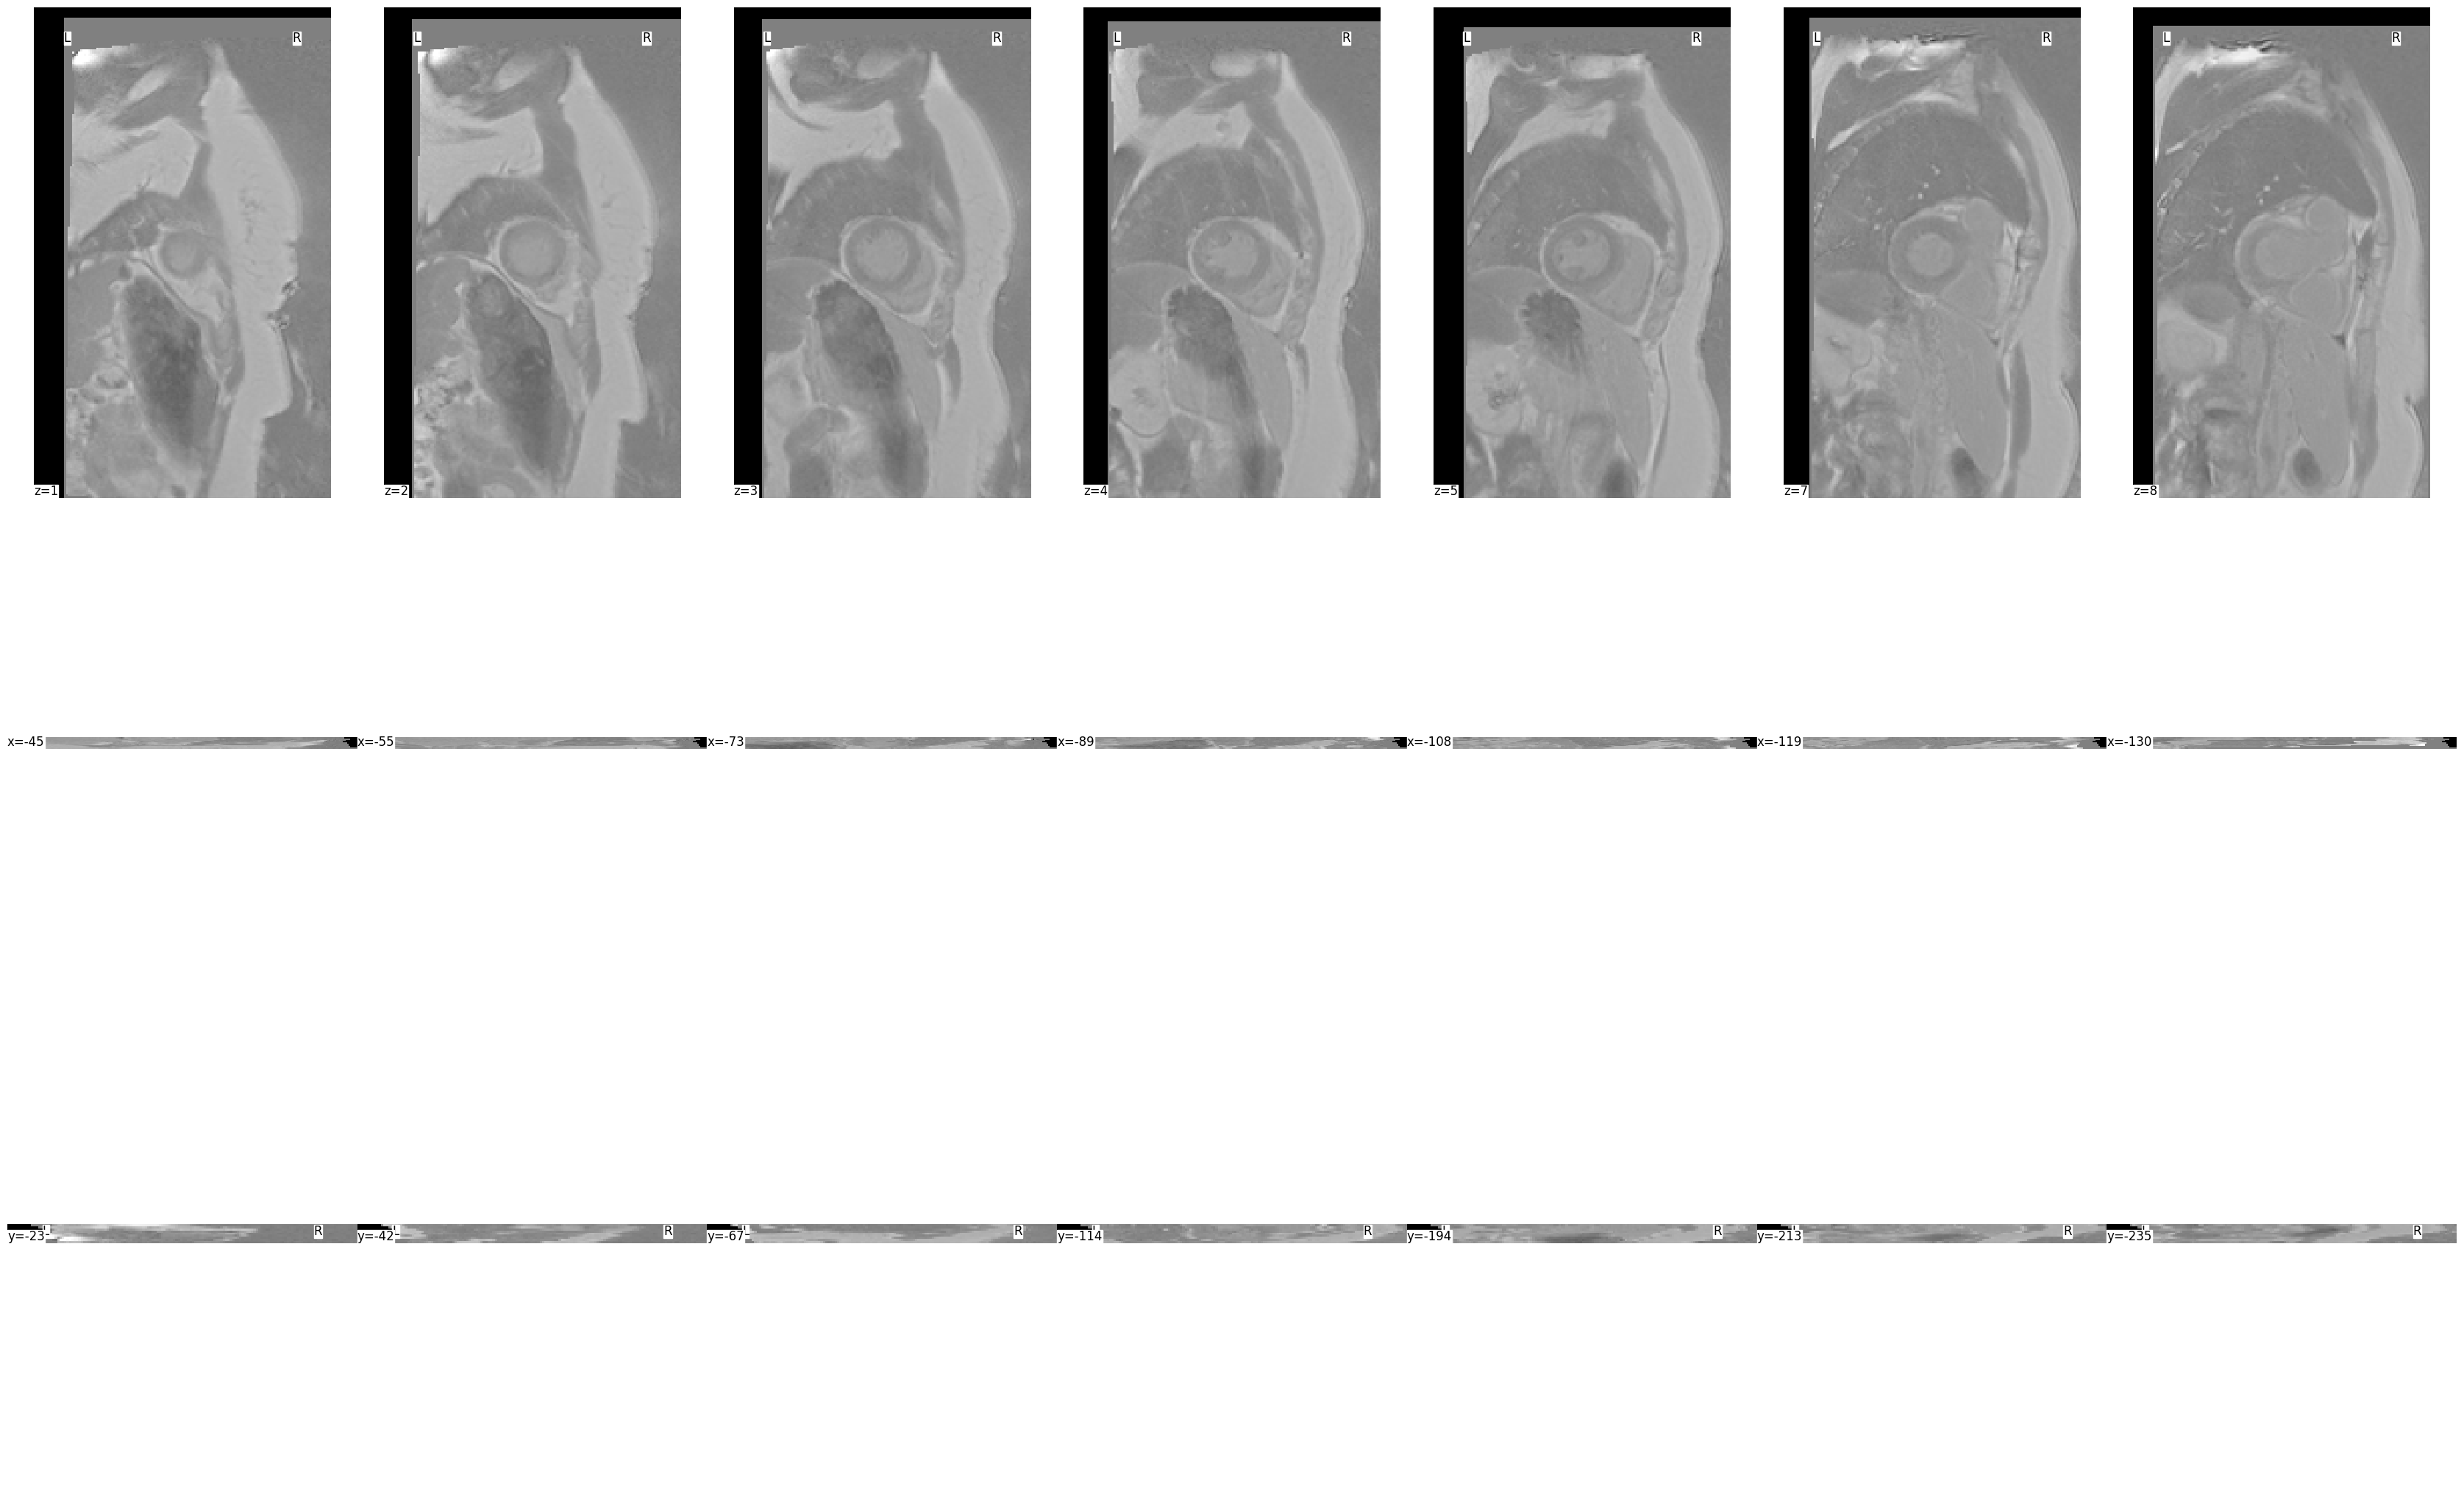

In [21]:
plotting.plot_img(MRI_vol, display_mode='mosaic', cmap='gray')
plt.show()

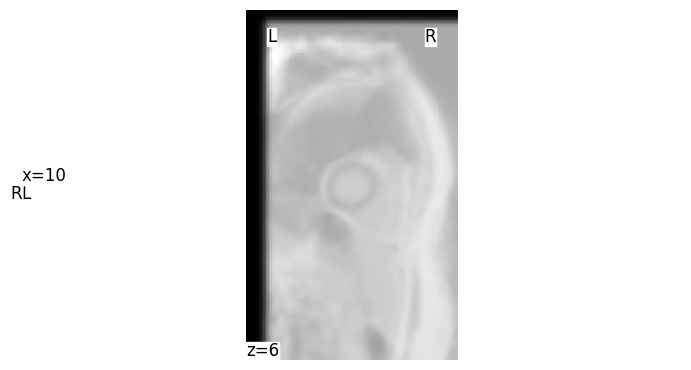

In [29]:
from nilearn import image
fwhm = 4

MRI_vol_smth = image.smooth_img(MRI_vol, fwhm)
plotting.plot_img(MRI_vol_smth, cmap = 'gray', cut_coords=[10, 20, 6])
plt.show()

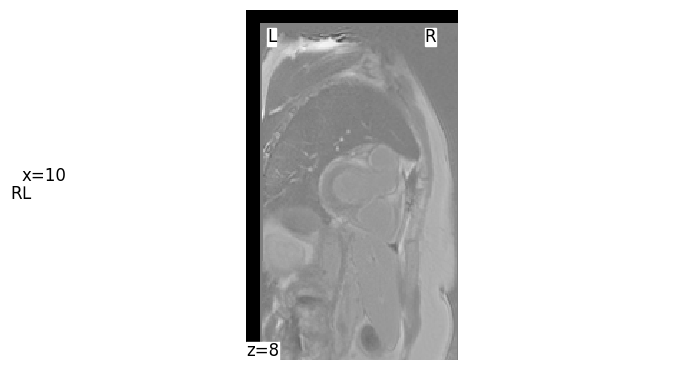

In [48]:

plotting.plot_img(MRI_vol, cmap = 'gray', cut_coords=[10, 20, 8])
plt.show()